In [1]:
# using data from https://github.com/jordancheah/DNA-FASTA-Python

import Bio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seqs=[]

from Bio import SeqIO
for sequence in SeqIO.parse('dna3.fasta', "fasta"):
    seqs.append(sequence.seq)

In [4]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    return onehot_encoded

In [6]:
import re
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'n', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['A','C','G','T','z']))

LabelEncoder()

In [38]:
import tensorflow
one_hot_seqs=[one_hot_encoder(i) for i in seqs]
padded_seqs=tensorflow.keras.preprocessing.sequence.pad_sequences(one_hot_seqs,value=2.0)
X=padded_seqs.reshape(padded_seqs.shape[0],padded_seqs.shape[1]*padded_seqs.shape[2])

In [39]:
import sklearn
from sklearn.decomposition import PCA

PCA = PCA(n_components=2)
PCA.fit(X)
PCA_X = PCA.transform(X)

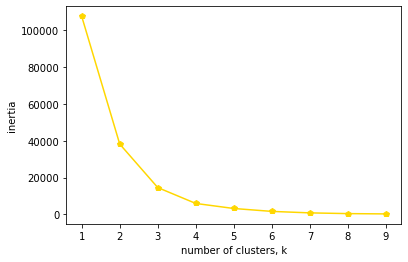

In [40]:
#Elbo method for selecting optimal number of clusters

from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(PCA_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

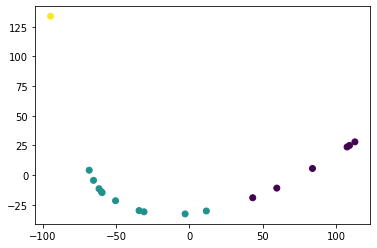

In [41]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=3)
model.fit(PCA_X)

labels = model.predict(PCA_X)
plt.scatter(PCA_X.T[0], PCA_X.T[1], c=labels)
plt.show()
